In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataset_name = "PeMS04"
# dataset_name = "PeMS08"
# dataset_name = "PeMS-BAY"
data_path = f"../../data/{dataset_name}/{dataset_name}.npz"
data = np.load(data_path)['data']
seq_len, num_vertex = data.shape
T=288
print("num_vertex:", num_vertex)
print("seq_len:", seq_len)

ValueError: too many values to unpack (expected 2)

In [45]:
def get_nodes_flows(data, n, num_vertex, start_T, end_T):
    flows=[]
    nodes=[]
    for i in range(n):
        random_node = np.random.randint(num_vertex)
        flow = data[start_T:end_T, random_node]
        nodes.append(random_node)
        flows.append(flow)
    return nodes,flows

def plot_blank(flows,nodes,start_T,end_T):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    for i in range(len(nodes)):
        sns.lineplot(x=np.arange(start_T,end_T), y=flows[i], label=f'Node {nodes[i]}')
    plt.title(f"Traffic Flow Data - {dataset_name}")
    plt.xlabel('Time Steps')
    plt.ylabel('Flow')
    plt.legend()
    plt.show()

def plot_with_time(flows,nodes,T=288):
    time_steps=np.arange(T)
    # 设置每12个时间步显示一个刻度
    x_ticks_indices = np.arange(0, len(time_steps), 12)
    x_ticks = time_steps[x_ticks_indices]
    # 设置对应的标签，假设从0:00开始
    x_labels = ['{}:00'.format(i) for i in range(24)]
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    for i in range(len(nodes)):
        sns.lineplot(x=time_steps, y=flows[i], label=f'Node {nodes[i]}')
    plt.xticks(x_ticks,x_labels,rotation=45)
    plt.title(f"Traffic Flow Data - {dataset_name}")
    plt.xlabel('Time')
    plt.ylabel('Flow')
    plt.legend()
    plt.show()

nodes= [146, 254]
flows:
flow 0.shape=(288,)
flow 1.shape=(288,)


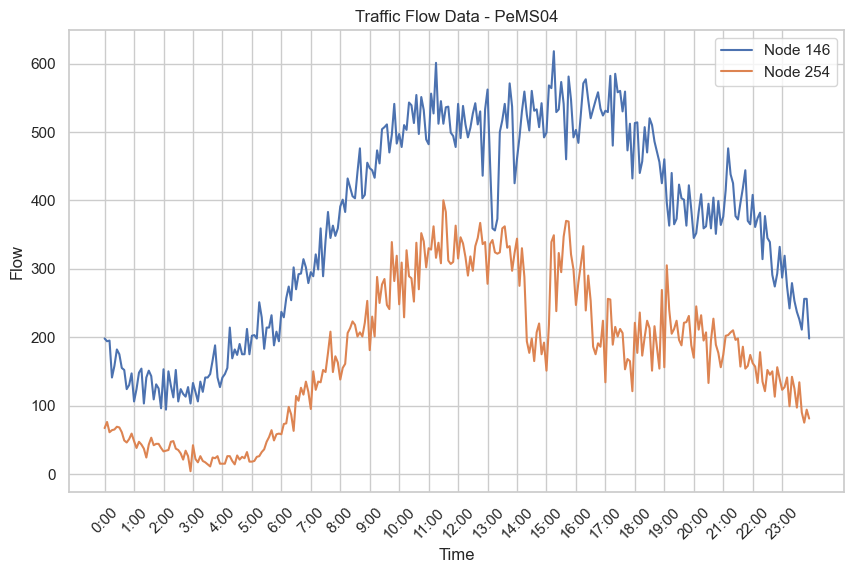

In [46]:
tmp = np.random.randint(seq_len//T)
start_T = T*tmp
end_T = T*(tmp+1)
nodes, flows = get_nodes_flows(data,2,num_vertex,start_T,end_T)
print("nodes=",nodes)
print("flows:")
for i in range(len(flows)):
    print(f"flow {i}.shape={flows[i].shape}")
plot_with_time(flows, nodes)